In [1]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import test_proportions_2indep
from scipy.stats import ttest_ind
from scipy.interpolate import UnivariateSpline
import json
from urllib.request import urlopen
import plotly.express as px

In [5]:
df = pd.read_csv("./data/CentracareIsolation_CLEANED.csv", index_col=0)

### Brief Documentation 
Each bullet point describes the data stored in each column of `df`
* **ID**
    * A unique identifier for each subject

* **Active Care Coordination**
    * `"1"`, if patient is in active care coordination
    * `"0"`, if patient is *not* in active care coordination

* **Age**
    * Patient's age at time of taking questionairre
    
* **Alcoholism**
    * `"Y"`, if patient suffers from alcholims
    * `nan`, if patient does *not* suffer from alcholism

* **CHF**
    * `"Y"`, if patient suffers from congestive heart failure
    * `nan`, if patient does *not* suffer from congestive heart failure

* **COPD**
    * `"Yes"`, if patient suffers from chronic obstructive pulmonary disease (COPD)
    * `nan`, if patient does *not* suffer from chronic obstructive pulmonary disease (COPD)

* **Depression**
    * `"Yes"`, if patient suffers from depression
    * `nan`, if patient does *not* suffer from depression

* **Diabetes**
    * `"Yes"`, if patient suffers from diabetes
    * `nan`, if patient does *not* suffer from diabetes
 
* **Ethnicity**
    * `"Non-Hispanic"`, if non-Hispanic
    * `"Hispanic"`, if Hispanic
    * `"Unknown"`, if unknown ethnicity
    * `"Choose Not to Disclose"`, if patient chose not to disclose
    * `nan`, if unkown

* **Gender**
    * `"M"`, if male
    * `"F"`, if female
    * `"X"`, if unspecific
    * `"U"`, if undisclosed
    
* **HTN**
    * `"Yes"`, if patient suffers from hypertension
    * `nan`, if patient does *not* suffer from hypertension

* **Language**
    * Patient's primary language
    * `"Unable to Obtain`, `"Unknown"`, and `"Unable to Read"` are included

* **LGB**
    * `"G"`, if gay
    * `"L"`, if lesbian
    * `nan`, if heterosexual *or* other

* **PCP Department**
    * Patient's primary care department *and/or* where the questionairre was taken
    * `nan`, if unable to obtain

* **Race**
    * Patient's race
    * `nan`, if unable to obtain
    
* **Tobacco Use**
    * `"Yes`, if patient regularly uses tobacco
    * `"No"`, if patient does *not* regularly use tobacco
    * `"Passive"`, if patient passively inhales tobacco (e.g., lives with someone who smokes)
    * `nan`, if unable to obtain

* **vape_user**
    * `"Y"`, if patient regularly uses a vape
    * `"N"`, if patient does *not* regularly use a vape
    
* **Zipcode**
    * Patient's home zipcode
    * `nan`, if unable to obtain

* **BERKMAN-SYME VARIABLES**
    * 'Groups_YN_Val', 'Marriage_Val', 'Religious_Val', 'GetTogether_Val', 'Phone_Val', 'NumGroupMeetings_Val' contain the numeric values associated with each patient's answer to the following 6 questions, respectively:
        1. Do you belong to any clubs or organizations such as church groups, unions, fraternal or athletic groups, or school groups?
        2. Are you married, widowed, divorced, separated, never married, or living with a partner?
        3. How often do you attend church or religious services?
        4. How often do you get together with friends or relatives?
        5. In a typical week, how many times do you talk on the phone with family, friends, or neighbors?
        6. How often do you attend meetings of the clubs or organizations you belong to?
    * 'Groups_YN_Ext', 'Marriage_Ext', 'Religious_Ext', 'GetTogether_Ext', 'Phone_Ext', 'NumGroupMeetings_Ext' contain the word(s) associated with the answer that the patient chose for each of the 6 questions.
    * 'Groups_YN_Score', 'Marriage_Score', 'Religious_Score', 'GetTogether_Score', 'Phone_Score', 'NumGroupMeetings_Score' contain the SCORES associated with the patient's answer to each of the 6 questions. These SCORES are added up to obtain the values in the 'SocialIntegrationScore'.
    
* **SOCIAL ISOLATION MEASURES**
    * 'SocialIntegrationScore' contains the summed scores for each subject (see above). Score 4+ = Socially Integrated; 3 = Moderately Integrated; 2 = Moderately Isolated; 1 or 0 = Socially Isolated.
        * See [Pantell et al., 2013](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3871270/) for more details
    * 'noMarriageSocialIntegrationScore' contains the summed scores for each subject **EXCLUDING** their score for marriage.
    * 'Isolation_YN' and 'noMarriageIsolation_YN' contain a classify each patient as Isolated (1) or not Isolated (0). A subject was classified as "isolated" if they had a SocialIntegrationScore (or noMarriageSocialIntegrationScore) < 2.
    
---
### OLD
* **FLO_MEAS_ID**
    * A unique number associated with each question, relevant to CentraCare

* **Last Date**
    * Likely related to the date on which patietn responded to questionairre

* **DISP_NAME**
    * The question asked to patient (text)

* **MEAS_VALUE**
    * Encoded patient response to question
    * `nan` if patient did not answer

* **MEAS_VALUE_EXTERNAL**
    * Decoded patient response to question (text)
    * `nan` if patient did not answer

(array([2259., 2883., 2756., 2711., 3006., 3194., 3405., 3602., 3750.,
        3412., 3295., 4077., 4140., 4871., 5298., 5300., 5410., 5150.,
        4066., 3053., 2465., 1871., 1409.,  839.,  489.,  237.,  127.]),
 array([18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66,
        69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99]),
 <BarContainer object of 27 artists>)

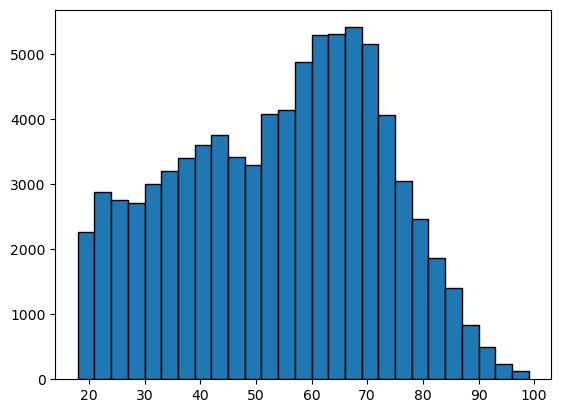

In [3]:
# Simple histogram of the age of patients
plt.hist(df["Age"], np.arange(18, 100, 3), edgecolor='black', lw=1)

In [146]:
# Proportion isolated in the entire dataset
df["Isolation_YN"].mean()

0.2619319891664159

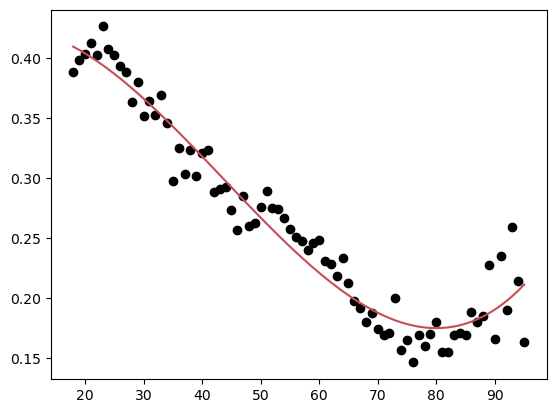

In [4]:
age_array = df.groupby("Age")["Isolation_YN"].mean()[:-4]
plt.scatter(age_array.index, age_array.values, c = "black")
spl = UnivariateSpline(age_array.index, age_array.values)
plt.plot(age_array.index, spl(age_array.index), label='Trend Line', color = "#c44e52")

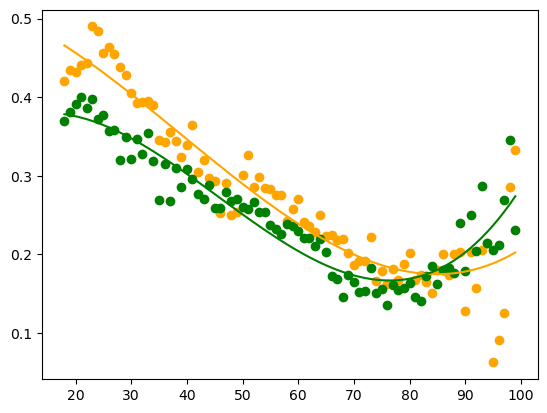

In [5]:
age_array = df.groupby(["Age", "Gender"])["Isolation_YN"].mean().reset_index()
female_array = age_array[age_array["Gender"] == "F"]
male_array = age_array[age_array["Gender"] == "M"]

plt.scatter(male_array["Age"], male_array["Isolation_YN"], color = "orange")
plt.scatter(female_array["Age"], female_array["Isolation_YN"], color = "green")

splfemale = UnivariateSpline(female_array["Age"], female_array["Isolation_YN"])
splmale = UnivariateSpline(male_array["Age"], male_array["Isolation_YN"])
plt.plot(male_array["Age"], splmale(male_array["Age"]), color = "orange")
plt.plot(female_array["Age"], splfemale(female_array["Age"]), color = "green")

In [45]:
race_array = df.groupby(["Age", "Race"])["Isolation_YN"].mean().reset_index()

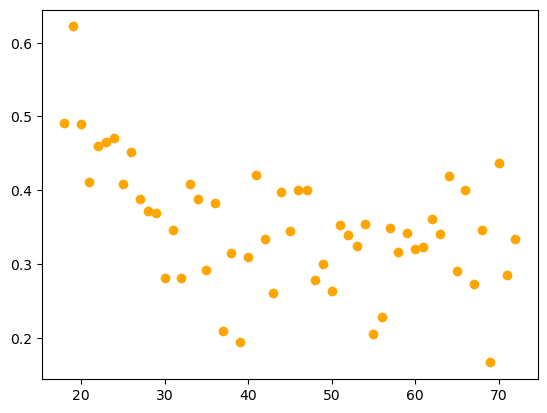

In [46]:
african_array = race_array[race_array["Race"] == "Black or African American"][:-21]
plt.scatter(african_array["Age"], african_array["Isolation_YN"], color = "orange")

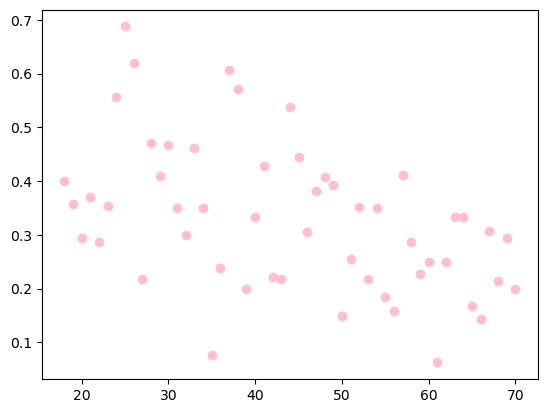

In [47]:
asian_array = race_array[race_array["Race"] == "Asian"][:-21]
plt.scatter(asian_array["Age"], asian_array["Isolation_YN"], color = "pink")

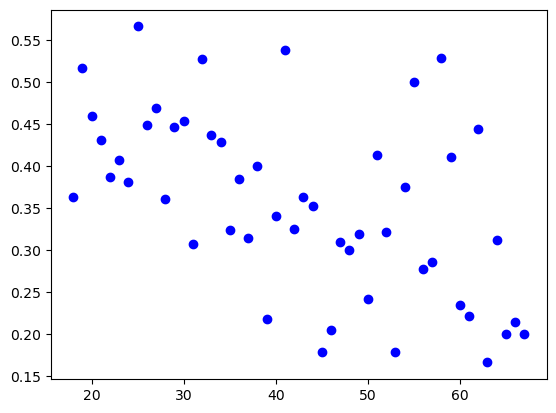

In [49]:
hispanic_array = race_array[race_array["Race"] == "Hispanic or Latino"][:-21]
plt.scatter(hispanic_array["Age"], hispanic_array["Isolation_YN"], color = "blue")

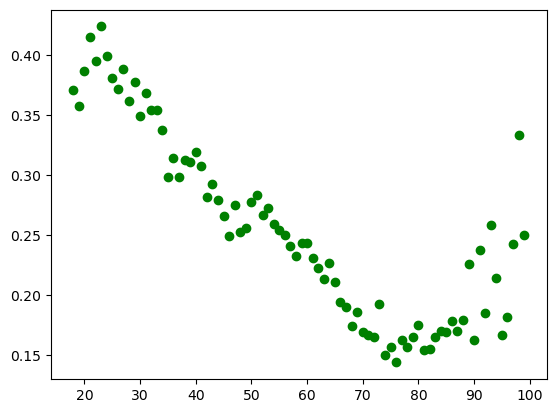

In [51]:
white_array = race_array[race_array["Race"] == "White"]
plt.scatter(white_array["Age"], white_array["Isolation_YN"], color = "green")